# Exploratory Data Analysis and Data Cleaning on Spotify Songs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('tracks.csv')

In [3]:
sorted_df = df_data.sort_values('popularity', ascending = False).head(100)
sorted_two_df = df_data.sort_values('popularity', ascending = True)
date = list(df_data.release_date)
for i in range(len(date)):
    date[i] = int(date[i][:4])

In [4]:
df_data['Year'] = date

In [5]:
df_pre90 = df_data[df_data.Year <= 1990]
df_post_90 = df_data[df_data.Year > 1990]

In [6]:
sorted_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


# Data Cleaning 

Let's do some preliminary exploration on the data. First of all, what type of records does it contain? How are the values for each record obtained? It appears that the name column contains individual songs and their respective names. In the rest of the data features, we can see durations, popularities and other audio features. Let's examine if any of these contain weird values that shouldn't be there, starting with the durations.

In [7]:
sorted_df['duration_ms'].value_counts().index.unique()

Int64Index([170813, 203064, 205090, 198082, 239836, 166794, 196653, 243837,
            289933, 130014, 261493, 204347, 247308, 192956, 132833, 165926,
            215280, 183624, 140942, 123263, 207481, 222523, 190476, 163208,
            173333, 214621, 207133, 198040, 169333, 208827, 211467, 245426,
            232253, 178627, 157606, 240051, 240133, 175721, 212093, 176840,
            312820, 233713, 272394, 269560, 185487, 194088, 209438, 208907,
            189486, 200186, 216107, 154998, 226987, 218107, 156945, 167903,
            186133, 172325, 116750, 203201, 279204, 161385, 261667, 242014,
            169153, 232853, 198371, 164000, 200040, 242096, 160191, 215627,
            132780, 174000, 162803, 169266, 199054, 186088, 227395, 215508,
            190779, 174321, 240400, 174760, 187541, 182161, 155884, 165507,
            178154, 150053, 215891, 166028, 160000, 181733, 173711, 178947,
            243773],
           dtype='int64')

In [8]:
print(max(sorted_df['duration_ms'].value_counts().index.unique()), min(sorted_df['duration_ms'].value_counts().index.unique()))

312820 116750


The miliseconds perhaps is hard to understand, so we'll convert this into minutes and seconds instead:

In [9]:
def minutes_seconds(x):
    to_seconds = x/1000
    to_minutes = to_seconds/60
    return to_minutes

sorted_df['duration_minutes'] = sorted_df['duration_ms'].map(minutes_seconds)
sorted_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,3.301367
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,4.033567
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,2.213000
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,...,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,3.593783
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,2.669850


Now we can take a look at how the song durations are distributed, and they seem like they form a left-skewed histogram, which more values at about 3 minutes. This prompts us to ask why songs tend to be shorter.

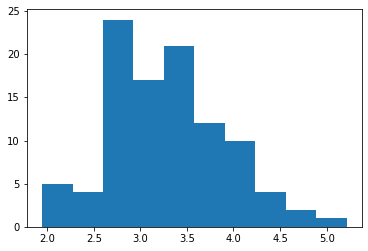

In [10]:
plt.hist(sorted_df['duration_minutes']);

There are other features we want to understand, such as time signature. It is not immediately apparent what this means, so let's look at what values it contains, and it turns out it has either 3,4 or 5 as its values.

In [11]:
sorted_df['time_signature'].value_counts().index.unique()

Int64Index([4, 3, 5], dtype='int64')

Below, you can see the entire list of columns in this dataframe. One that is also hard to understand at first is "key". Looking at its values, it appears to have integers from 0 to 11. What does that correspond to?

In [12]:
sorted_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'duration_minutes'],
      dtype='object')

In [13]:
sorted_df['key'].unique()

array([ 0, 10,  4, 11,  5,  1,  8,  2,  6,  7,  9,  3])

Now let's look at the "artists" column, which is a Series with a list for each artist in a particular song, and the song columns. Are there any weird values here?

In [14]:
sorted_df['artists'][:10]

93802      ['Justin Bieber', 'Daniel Caesar', 'Giveon']
93803                                ['Olivia Rodrigo']
93804                                   ['Masked Wolf']
92810                                    ['The Weeknd']
92811                                    ['Kali Uchis']
93805    ['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']
92813                                    ['The Weeknd']
92814                                        ['Tiësto']
92816                                        ['Giveon']
92819                           ['Myke Towers', 'Juhn']
Name: artists, dtype: object

In [15]:
sorted_df['artists'].unique()

array(["['Justin Bieber', 'Daniel Caesar', 'Giveon']",
       "['Olivia Rodrigo']", "['Masked Wolf']", "['The Weeknd']",
       "['Kali Uchis']", "['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",
       "['Tiësto']", "['Giveon']", "['Myke Towers', 'Juhn']",
       "['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']",
       "['Los Legendarios', 'Wisin', 'Jhay Cortez']", "['Doja Cat']",
       "['The Kid LAROI']", "['SZA']", "['Bad Bunny', 'ROSALÍA']",
       "['Nathan Evans', '220 KID', 'Billen Ted']",
       "['Bad Bunny', 'Jhay Cortez']", "['Ariana Grande']", "['Boza']",
       "['MEDUZA', 'Dermot Kennedy']", "['Justin Bieber']", "['Cardi B']",
       "['Rochy RD', 'Myke Towers', 'Nicki Nicole']", "['Harry Styles']",
       "['Travis Scott', 'HVME']", "['Tate McRae']", "['BTS']",
       "['KAROL G']", "['DaBaby', 'Roddy Ricch']", "['Pop Smoke']",
       "['Joel Corry', 'MNEK']", "['Sech']", "['ATB', 'Topic', 'A7S']",
       "['Drake']", "['Dua Lipa']", "['Saweetie', 'Doja Cat

In [16]:
len(sorted_df['name'].unique()) == len(sorted_df['name'])

False

Interestingly, a quick check that all of the songs are unique (i.e. songs appear only once in the dataframe), turns out to be false. That is, there could be duplicate songs, which we need to clean before we proceed. From below, it seems that there are 97 unique songs, but 100 songs in total in the dataframe. We can do this by grouping and sorting by the count. There are three songs that appear 2 times each, instead of 1 time as they should.

In [17]:
len(sorted_df['name'].unique())

97

In [18]:
len(sorted_df['name'])

100

In [19]:
sorted_df.groupby(['name']).size().sort_values(ascending = False)

name
DÁKITI                                                2
Levitating (feat. DaBaby)                             2
Hold On                                               2
34+35                                                 1
Roses - Imanbek Remix                                 1
                                                     ..
GIRL LIKE ME                                          1
Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit    1
For The Night (feat. Lil Baby & DaBaby)               1
Film out                                              1
you broke me first                                    1
Length: 97, dtype: int64

In [20]:
sorted_df[sorted_df['name'] == 'DÁKITI']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
92824,47EiUVwUp4C9fGccaPuUCS,DÁKITI,92,205090,1,"['Bad Bunny', 'Jhay Cortez']","['4q3ewBCX7sLwd24euuV69X', '0EFisYRi20PTADoJri...",2020-10-30,0.731,0.573,...,-10.059,0,0.0544,0.401,0.000052,0.113,0.145,109.928,4,3.418167
92847,4MzXwWMhyBbmu6hOcLVD49,DÁKITI,90,205090,1,"['Bad Bunny', 'Jhay Cortez']","['4q3ewBCX7sLwd24euuV69X', '0EFisYRi20PTADoJri...",2020-11-27,0.731,0.573,...,-10.059,0,0.0544,0.401,0.000052,0.113,0.145,109.928,4,3.418167


In [21]:
sorted_df[sorted_df['name'] == 'Levitating (feat. DaBaby)']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
92843,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),90,203064,0,"['Dua Lipa', 'DaBaby']","['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...",2020-10-01,0.702,0.825,...,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,102.977,4,3.3844
92867,5nujrmhLynf4yMoMtj8AQF,Levitating (feat. DaBaby),89,203064,0,"['Dua Lipa', 'DaBaby']","['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...",2020-03-27,0.702,0.825,...,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,102.977,4,3.3844


In [22]:
sorted_df[sorted_df['name'] == 'Hold On']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
93811,4u4NyuceXP7Uzh7XFJKCr1,Hold On,92,170813,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],2021-03-05,0.658,0.634,...,-5.797,0,0.0413,0.0106,0.0,0.132,0.290,139.980,4,2.846883
93838,1nahzW3kfMuwReTka28tH5,Hold On,88,170813,0,['Justin Bieber'],['1uNFoZAHBGtllmzznpCI3s'],2021-03-19,0.658,0.634,...,-6.068,0,0.0431,0.0104,0.0,0.120,0.302,140.002,4,2.846883


We need to decide how to deal with these, especially as each of these has a different popularity score for the same song, which is impossible when ranking the top 100 songs. Let's first look at the values in the popularity column. So it does look like the values don't go from 1 to 100, as we previously assumed. Instead, they go from 87 to 100. 87 seems arbitrary, so let's look a bit more into that. It is hard to tell from this one dataframe what could be going wrong, but there are some clues in the "release_date" column.

In [23]:
sorted_df.sort_values('popularity', ascending = True).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
78355,2Lhdl74nwwVGOE2Gv35QuK,Cupid's Chokehold / Breakfast in America,87,243773,0,['Gym Class Heroes'],['4IJczjB0fJ04gs4uvP0Fli'],2005-02-22,0.720,0.744,...,-6.938,0,0.1200,0.23700,0.000000,0.2550,0.619,78.953,4,4.062883
86017,3U4isOIWM3VvDubwSI3y7a,All of Me,87,269560,0,['John Legend'],['5y2Xq6xcjJb2jVM54GHK3t'],2013-08-30,0.422,0.264,...,-7.064,1,0.0322,0.92200,0.000000,0.1320,0.331,119.930,4,4.492667
86018,5FVd6KXrgO9B3JPmC8OPst,Do I Wanna Know?,87,272394,0,['Arctic Monkeys'],['7Ln80lUS6He07XvHI8qqHH'],2013-09-09,0.548,0.532,...,-7.596,1,0.0323,0.18600,0.000263,0.2170,0.405,85.030,4,4.539900
89912,7qiZfU4dY1lWllzX7mPBI3,Shape of You,87,233713,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2017-03-03,0.825,0.652,...,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4,3.895217
90906,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,87,312820,1,['Travis Scott'],['0Y5tJX1MQlPlqiwlOH1tJY'],2018-08-03,0.834,0.730,...,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,4,5.213667


In [24]:
sorted_df['popularity'].unique()

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87])

In [25]:
max(sorted_df['release_date'])

'2021-04-09'

In [26]:
min(sorted_df['release_date'])

'2005-02-22'

The dates aren't from the same year, so this could be some merging together of different songs from various years, which might have been popular when they were released. Here is a plot of the dates, which is slightly unclear to see, so we will process that now by only extracting the year.

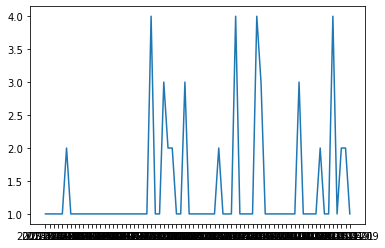

In [27]:
y = sorted_df.groupby(['release_date']).count()['id'].values
plt.plot(sorted_df.groupby(['release_date']).count().index, y)

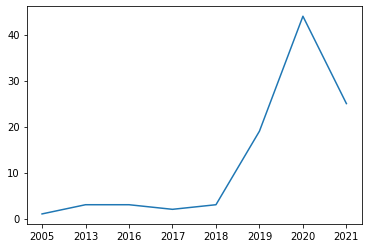

In [28]:
years = sorted_df['release_date'].map(lambda x: x[:4])
sorted_df['year'] = years
y = sorted_df.groupby(['year']).count()['id'].values
plt.plot(sorted_df.groupby(['year']).count().index, y)

Now that we have a much clearer plot, there is some extra insight in the data. It seems like the majority of the songs are from 2020, but there are a few from other years as well. It is unclear how those got there, but the popularity column seems a bit useless now. So we can simply pick one of the duplicated songs to keep in the dataframe.

In [29]:
sorted_df_fixed = sorted_df.groupby(['name'], as_index=False).agg(lambda x: x.iloc[0]).index
#sorted_df_fixed = sorted_df.set_index('name')[sorted_df_fixed]
#sorted_df.set_index('name')
#sorted_df.loc[sorted_df_fixed, :]
sorted_df_fixed

RangeIndex(start=0, stop=97, step=1)

Now we can go on to the sorted_two_df dataframe, and examine the data there.

In [30]:
sorted_two_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4


## Networks of Similar Songs

For this part, I want to build a network of songs based on the similarity of their features. This is going to require using the networkx package, as well as some spatial_distance packages. First, we are going to be using cosine distance to measure the similarity between two songs. Below, there is an example of doing so, as well as taking the useful features for each song in consideration, and only adding a song to another's list of similar songs if the cutoff is at least .95.

In [31]:
import networkx as nx

In [32]:
from scipy import spatial

In [33]:
list_songs = list(sorted_df.name)

In [34]:
sorted_df.iloc[1, :].values[13:20]

array([0.0601, 0.721, 1.31e-05, 0.105, 0.132, 143.874, 4], dtype=object)

In [35]:
spatial.distance.cosine(sorted_df.iloc[1, :].values[13:20], sorted_df.iloc[0, :].values[13:20])

0.00015599575013414135

In [36]:
dict_edges = {}
for i in range(len(list_songs)):
    list_val = []
    for j in range(i):
        a_row = list(sorted_df.iloc[j].values[13:20])
        list_val.append([j, 1 - spatial.distance.cosine(sorted_df.iloc[i].values[13:20], a_row),list(sorted_df.iloc[j].values[13:20])[1] ])
    for j in range(i+1,len(list_songs)):    
        a_row = list(sorted_df.iloc[j].values[13:20])
        list_val.append([j, 1 - spatial.distance.cosine(sorted_df.iloc[i].values[13:20], a_row), list(sorted_df.iloc[j].values[13:20])[1]])
    dict_edges[i] = list_val 

In [37]:
new_dict = {}
for i in range(100):
    list_to_put = []
    for j in range(len(dict_edges[i])):
        if dict_edges[i][j][1] >= 0.95:
            list_to_put.append(dict_edges[i][j])      
    new_dict[i] = list_to_put

In [38]:
G = nx.MultiDiGraph()
game_details = ["name"]
for i in range(1):
    for j in range(len(new_dict[i])):
        G.add_node(i,label = i)
        G.add_edge(i, new_dict[i][j][0], weight=int(new_dict[i][j][1]), title = new_dict[i][j][2])

Time to do some visualizations on the data. Below, there is a graph of all of the songs, and their similar songs as defined by our metric.

/opt/conda/lib/python3.9/site-packages/networkx/drawing/layout.py:727: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


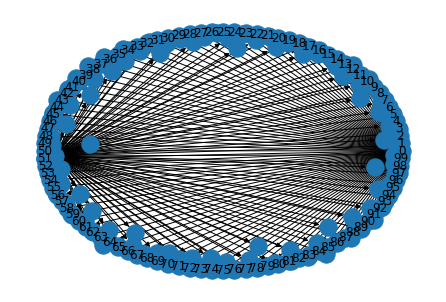

In [39]:
import urllib.request
import io
import zipfile
import matplotlib.pyplot as plt
import networkx as nx


pos = nx.draw_kamada_kawai(G, with_labels=True)  # Seed for reproducible layout
nx.draw(G, pos)
plt.show()

In [40]:
max_deg = 0
node = 0
for n in G.nodes():
    if G.degree[n] > max_deg:
        max_deg = G.degree[n]
        node = n
print(max_deg, node)   

99 0


In [41]:
sum_d = 0
for n in G.nodes():
    sum_d += G.degree[n]
sum_d/len(G.nodes())

1.98

In [42]:
len(G.nodes())

100

In [43]:
sorted_df.iloc[55]

id                      20McUFi8KCIVdNDLrkTDuZ
name                                Goosebumps
popularity                                  89
duration_ms                             163208
explicit                                     1
artists                               ['HVME']
id_artists          ['2o08sCWF5yyo2G4DCiT7T9']
release_date                        2020-06-12
danceability                             0.767
energy                                   0.659
key                                          1
loudness                                -7.429
mode                                         1
speechiness                             0.0444
acousticness                             0.325
instrumentalness                           0.0
liveness                                  0.13
valence                                  0.439
tempo                                  124.946
time_signature                               4
duration_minutes                      2.720133
year         

## Scraping the Lyrics Data  

In [44]:
# LyricsGenius API

In [45]:
!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /tmp/pip-req-build-onznqm4d
  Created wheel for lyricsgenius: filename=lyricsgenius-3.0.1-py3-none-any.whl size=44669 sha256=da02595658410192345e23324652e7121f5c190f28cd0914aee122e01610a833
  Stored in directory: /tmp/pip-ephem-wheel-cache-z0tlhqhm/wheels/22/d8/54/6e236bc9517965a346a5b6cd223931b13f1eb6ba8676f1078c
Successfully built lyricsgenius


In [46]:
import lyricsgenius
LyricsGenius = lyricsgenius.Genius(client_access_token)

NameError: name 'client_access_token' is not defined

In [ ]:
song = LyricsGenius.search_song("Missy Elliott", "Work It")

In [ ]:
song.lyrics

In [ ]:
#let's get the lyrics for the songs in our dataset

In [ ]:
#building a list of lists, with each element having Artist_Name and Song_Name:
list_artists_songs = []
lyrics_each = []

In [ ]:
songs_list =  list(df_data.name)
artists_list = list(df_data.artists)

In [ ]:
print(len(songs_list), len(artists_list))

In [ ]:
for i in range(len(songs_list)):
    r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
    r = r1.findall(artists_list[i])
    if len(r) > 0:
        for j in r:
            list_artists_songs.append([songs_list[i], j])

In [ ]:
print(len(list_artists_songs))

In [ ]:
already_chosen = list(pd.read_csv("ChosenAlready").Numbers)

In [ ]:
#make these randomly selected
for i in range(200):
    value = randint(0,915191)
    if value not in already_chosen:
        already_chosen.append(value)
        song = LyricsGenius.search_song(list_artists_songs[value][1], list_artists_songs[value][0])
        if song != None:
            lyrics_each.append(song.lyrics)

In [ ]:
df_old_lyrics_l = list(pd.read_csv('283_SONGS').Text)
new_lyrics = df_old_lyrics_l + lyrics_each

In [ ]:
print(len(new_lyrics))

In [ ]:
df_already = pd.DataFrame(data = {'Numbers': already_chosen})
df_already.to_csv('ChosenAlready', index = False)

In [ ]:
df_lyrics = pd.DataFrame(data = {'Text': df_old_lyrics_l})
df_lyrics.to_csv('400 Songs', index = True)

## Visualization 5: Lyrics Data: Unigrams and Bigrams

In [ ]:
df_read_lyrics = pd.read_csv('400 Songs')

In [ ]:
df_read_lyrics.head()

In [ ]:
import sys
!{sys.executable} -m pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
w = TextBlob(str(df_read_lyrics.iloc[0].Text))

In [ ]:
w.sentiment.polarity

In [ ]:
list_polarities = []
for i in range(len(df_read_lyrics.index)):
    w = TextBlob(str(df_read_lyrics.iloc[i].Text))
    list_polarities.append(w.sentiment.polarity)
    print(len(w))

In [ ]:
import numpy as np

In [ ]:
pol = pd.DataFrame(data = {'Polarity':list_polarities})

In [ ]:
np.mean(list_polarities)

In [ ]:
pol.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(x = 'From_All', y = 'valence', data = sorted_df_1)

fig, ax = plt.subplots(figsize=(8,  8))
pol.boxplot('Polarity')

In [ ]:
w = TextBlob(str(df_read_lyrics.iloc[7].Text))
w.tags

In [ ]:
n_perc = []
plural_perc = []
reg_ad_perc = []
comp_ad_perc = []
super_ad_perc = []
verb_perc = []

for i in range(len(df_read_lyrics.index)):
    nouns_count = 0
    plural = 0
    reg_adv = 0
    comp_adv = 0 
    super_adv = 0
    verb = 0
    w = TextBlob(str(df_read_lyrics.iloc[i].Text))
    if len(w.tags) <= 10000:
        for j in range(len(w.tags)):
            if w.tags[j][1] == 'NN':
                nouns_count += 1
            if w.tags[j][1] == 'NNS':
                plural += 1
            if w.tags[j][1] == 'RB':
                reg_adv += 1
            if w.tags[j][1] == 'RBS':
                super_adv += 1
            if w.tags[j][1] == 'RBR':
                comp_adv += 1 
            if w.tags[j][1] == 'VB':
                verb += 1  
        print(i, 'Processed')        
        n_perc.append(nouns_count/len(w.tags)) 
        plural_perc.append(plural/len(w.tags)) 
        reg_ad_perc.append(reg_adv/len(w.tags)) 
        comp_ad_perc.append(comp_adv/len(w.tags)) 
        super_ad_perc.append(super_adv/len(w.tags)) 
        verb_perc.append(verb/len(w.tags)) 

In [ ]:
len(n_perc)

In [ ]:
poly = pd.DataFrame(data = {'Noun_singular':n_perc})

In [ ]:
poly['Noun_singular'] = n_perc
poly['Noun_plural'] = plural_perc
poly['Regular_ad'] = reg_ad_perc
poly['Comp_ad'] = comp_ad_perc
poly['Super_ad'] = super_ad_perc
poly['Verb'] = verb_perc

In [ ]:
poly.to_csv('Metrics', index = True)

In [ ]:
poly = pd.read_csv('Metrics')

In [ ]:
poly.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,  9))
poly.boxplot(['Noun_singular', 'Noun_plural', 'Regular_ad', 'Verb'])

In [ ]:
fig, ax = plt.subplots(figsize=(9,  9))
poly.boxplot(['Comp_ad', 'Super_ad'])

# Geographical Analysis

In this part, I want to do something different. I want to extract some geographical information from the songs' lyrics. How do we do that? I think I am going to start with which cities are the most mentioned in these songs. For this I am going to need a dataframe with names of cities to compare.

In [49]:
df_lyrics = pd.read_csv("400 Songs")
df_lyrics.head()

,Unnamed: 0,Text
0,0,"[Verse]\nI feel so impure\nEvery day, less sur..."
1,1,THE AMERICAN ACADEMY of Emergency Medicine con...
2,2,"[Intro: Young M.A]\nAw man, the squad is here\..."
3,3,All these songs are about (or heavily referenc...
4,4,"[Paroles de ""Respect P. Diddy""]\n\n[Intro : Go..."


We should convert the names of the cities to lower case:

In [50]:
df = pd.read_csv('citynames.txt')

In [51]:
df.head()

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,RaÊ¼s al Khaymah,291074
4,Khawr FakkÄn,United Arab Emirates,Ash ShÄriqah,291696


In [52]:
df['fixed_names'] = df['name'].str.lower()
df.head()

,name,country,subcountry,geonameid,fixed_names
0,les Escaldes,Andorra,Escaldes-Engordany,3040051,les escaldes
1,Andorra la Vella,Andorra,Andorra la Vella,3041563,andorra la vella
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594,umm al qaywayn
3,Ras al-Khaimah,United Arab Emirates,RaÊ¼s al Khaymah,291074,ras al-khaimah
4,Khawr FakkÄn,United Arab Emirates,Ash ShÄriqah,291696,khawr fakkän


Let's clean the lyrics a bit more, and also tokenize them to see if any of the cities appear in the lyrics. As you can see, there are many "\", as well as new line characters.

In [53]:
df_lyrics['Text'].iloc[0]

"[Verse]\nI feel so impure\nEvery day, less sure\nAnd I pour, and I pour\nFrom my hands, from my head\nAnd I wish you were here\nBut you disappeared again\n(Otra vez)\nI'm stuck and motionless\nEmotions drain my heart\nMore blood, more sweat\nA feeling I can regret\n\n[Chorus]\nEvery day, every move's a mistake\nI want to leave this place\nEvery day a waste\nI want to leave this place\nEvery day a waste\nI want to leave this place\nEvery day a waste"

In [54]:
import re

df_lyrics['adjusted_text'] = df_lyrics['Text'].map(lambda x: re.sub(r'\n', ' ', x)).str.lower()
df_lyrics.head()

,Unnamed: 0,Text,adjusted_text
0,0,"[Verse]\nI feel so impure\nEvery day, less sur...","[verse] i feel so impure every day, less sure ..."
1,1,THE AMERICAN ACADEMY of Emergency Medicine con...,the american academy of emergency medicine con...
2,2,"[Intro: Young M.A]\nAw man, the squad is here\...","[intro: young m.a] aw man, the squad is here r..."
3,3,All these songs are about (or heavily referenc...,all these songs are about (or heavily referenc...
4,4,"[Paroles de ""Respect P. Diddy""]\n\n[Intro : Go...","[paroles de ""respect p. diddy""] [intro : goua..."


Now we can check for cities mentioned in the songs, but first we need to tokenize each song's lyrics, and then check if any of the cities in the list are mentioned in a song's tokens. First, notice that there are some other words that signify place inside these tokens: such as "American", or the identity of someone that is related somehow to America. While not directly places, these words could also potentially help us with mapping songs to place.

In [55]:
from nltk.tokenize import word_tokenize
def adding_tokens(x):
    return word_tokenize(x)
df_lyrics['tokenized'] = df_lyrics['adjusted_text'].map(lambda x: adding_tokens(x))
df_lyrics.head()    

,Unnamed: 0,Text,adjusted_text,tokenized
0,0,"[Verse]\nI feel so impure\nEvery day, less sur...","[verse] i feel so impure every day, less sure ...","[[, verse, ], i, feel, so, impure, every, day,..."
1,1,THE AMERICAN ACADEMY of Emergency Medicine con...,the american academy of emergency medicine con...,"[the, american, academy, of, emergency, medici..."
2,2,"[Intro: Young M.A]\nAw man, the squad is here\...","[intro: young m.a] aw man, the squad is here r...","[[, intro, :, young, m.a, ], aw, man, ,, the, ..."
3,3,All these songs are about (or heavily referenc...,all these songs are about (or heavily referenc...,"[all, these, songs, are, about, (, or, heavily..."
4,4,"[Paroles de ""Respect P. Diddy""]\n\n[Intro : Go...","[paroles de ""respect p. diddy""] [intro : goua...","[[, paroles, de, ``, respect, p., diddy, '', ]..."


Now, let's take the first tokenized list to see if there are any matches to cities. And it looks like there aren't. Are there really no songs with mentions of cities in their lyrics? No, obviously we can name a few that have cities in the title, especially songs about New York or Los Angeles. 

In [58]:
list_of_cities = df['fixed_names']
list_of_cities

In [65]:
def searching_for_cities(x):
    count = 0
    for word in x:
        if word in list_of_cities:
            count += 1
            print(word)
    print(count)
df_lyrics['tokenized'].map(lambda x: searching_for_cities(x))          

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0      None
1      None
2      None
3      None
4      None
       ... 
278    None
279    None
280    None
281    None
282    None
Name: tokenized, Length: 283, dtype: object

To have a larger dataset of songs, we are going to have to look for one. One way is to write a script that uses LyricsGenius to pull these lyrics.